#### Limbic system volume will decrease as the age of patient increases.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [162]:
# Load the ADNI Data
data=pd.read_excel('ADNI_ICM_random200.xlsx')
data=data.replace({'\'':''},regex=True) #delete the ' ' of values
data = data.rename(columns=lambda x:x.strip('\'')) #delete the '' of the keys
#print(data)
# Select columns as need
rolls=['Amyg_R','Fimbria_R','Hippo_R','Mammillary_R','Amyg_L','Fimbria_L','Hippo_L','Mammillary_L']
p_info=['Subject_ID', 'Gender', 'Age', 'Diagnosis']
cols=np.concatenate((p_info,rolls),axis=0)
#print(cols)
dat_need=data[cols]
#print(dat_need)

In [163]:
# Load the ADNI Data
data=pd.read_excel('ADNI_ICM_random200.xlsx')
data=data.replace({'\'':''},regex=True) #delete the ' ' of values
data = data.rename(columns=lambda x:x.strip('\'')) #delete the '' of the keys
#print(data)
# Select columns as need
rolls=['Amyg_R','Fimbria_R','Hippo_R','Mammillary_R','Amyg_L','Fimbria_L','Hippo_L','Mammillary_L']
p_info=['Subject_ID', 'Gender', 'Age', 'Diagnosis']
cols=np.concatenate((p_info,rolls),axis=0)
#print(cols)
dat_need=data[cols]
#print(dat_need)

In [164]:
data_volume=dat_need.copy()
# Sum the value of each side
Amyg=np.zeros(200)
Fimbria=np.zeros(200)
Mammlillary=np.zeros(200)
Hippo=np.zeros(200)

data_volume['Amyg']=data_volume.Amyg_R+data_volume.Amyg_L
data_volume['Fimbria']=data_volume.Fimbria_R+data_volume.Fimbria_L
data_volume['Mammillary']=data_volume.Mammillary_R+data_volume.Mammillary_L
data_volume['Hippo']=data_volume.Hippo_R+data_volume.Hippo_L


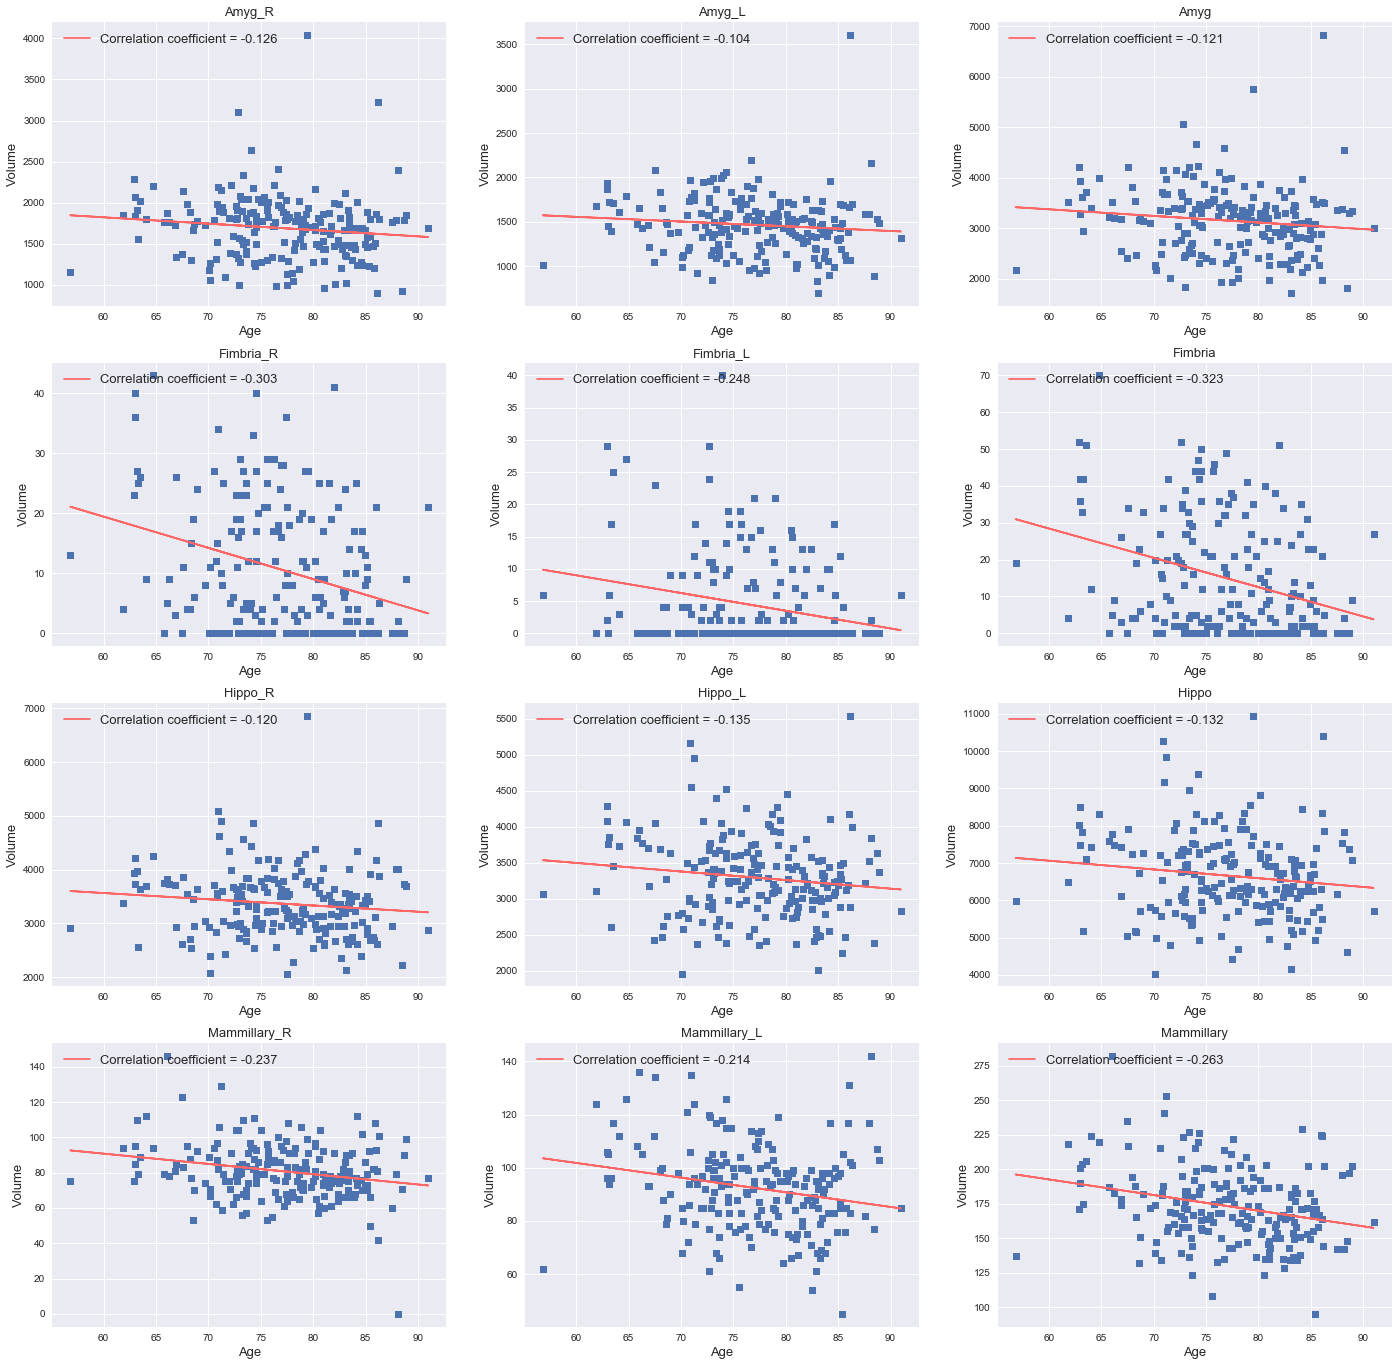

In [165]:
# Linear Regression
sets=['Amyg_R','Amyg_L','Amyg','Fimbria_R','Fimbria_L','Fimbria',
'Hippo_R','Hippo_L','Hippo','Mammillary_R','Mammillary_L','Mammillary']
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(24, 24))
coefficients=np.zeros(12)
for i in range(0,12):
    #print(sets[i])
    slope, intercept, r, p, stderr = scipy.stats.linregress(data_volume['Age'], data_volume[sets[i]])
    line = f'Correlation coefficient = {r:.3f}'
    coefficients[i]=r
    axes[i//3,i%3].plot(data_volume['Age'], data_volume[sets[i]], linewidth=0, marker='s')
    axes[i//3,i%3].plot(data_volume['Age'], intercept + slope * data_volume['Age'],label=line, color='#FF6666')
    axes[i//3,i%3].set_xlabel('Age', fontsize=13)
    axes[i//3,i%3].set_ylabel('Volume', fontsize=13)
    axes[i//3,i%3].set_title(sets[i], fontsize=13)
    axes[i//3,i%3].legend(facecolor='white',loc='upper left', shadow= True, fontsize=13)

plt.show()


In [166]:
# Show Pearson's Coefficients to adjust linear relationship
for i in range(0,12):
    print("The Correlation coefficient of "+sets[i] +' volume and Age = '+str(coefficients[i]))

The Correlation coefficient of Amyg_R volume and Age = -0.1255706588563713
The Correlation coefficient of Amyg_L volume and Age = -0.10448509489632063
The Correlation coefficient of Amyg volume and Age = -0.12145387394878772
The Correlation coefficient of Fimbria_R volume and Age = -0.30300877398065235
The Correlation coefficient of Fimbria_L volume and Age = -0.24750298449656583
The Correlation coefficient of Fimbria volume and Age = -0.32293418554360237
The Correlation coefficient of Hippo_R volume and Age = -0.11973953807997395
The Correlation coefficient of Hippo_L volume and Age = -0.13479399268903075
The Correlation coefficient of Hippo volume and Age = -0.13164324633110575
The Correlation coefficient of Mammillary_R volume and Age = -0.23658246329340357
The Correlation coefficient of Mammillary_L volume and Age = -0.2139426981803414
The Correlation coefficient of Mammillary volume and Age = -0.26270495751109074


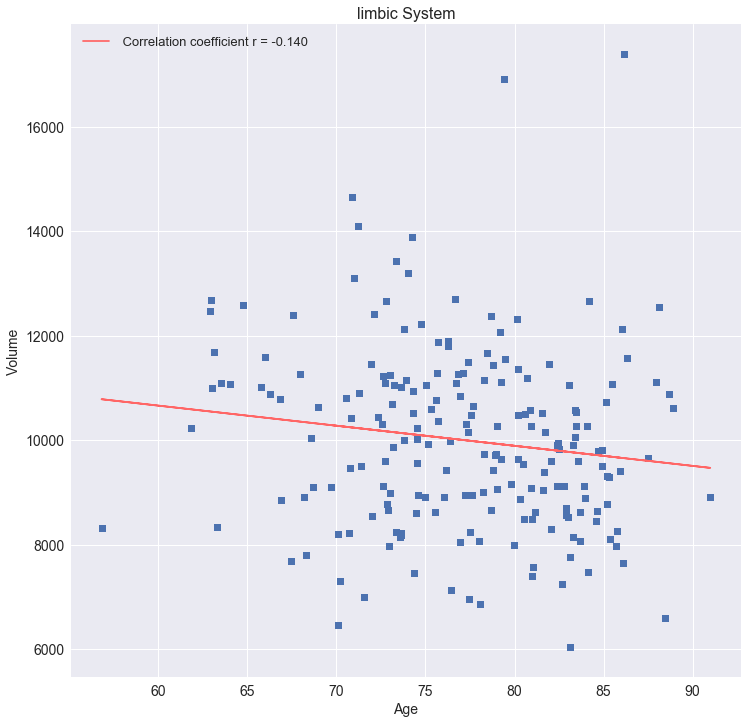

The Correlation coefficient of Whole volume of limbic system and Age = -0.14026164149675144


In [167]:
#Sum up the whole limbic system
Whole_value=np.zeros(200)
for i in range(0,8):
    Whole_value=Whole_value+data_volume[rolls[i]]
#print(Whole_value)

slope, intercept, r, p, stderr = scipy.stats.linregress(data_volume['Age'], Whole_value)
line = f' Correlation coefficient r = {r:.3f}'
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(data_volume['Age'], Whole_value, linewidth=0, marker='s')
ax.plot(data_volume['Age'], intercept + slope * data_volume['Age'],label=line, color='#FF6666')
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Volume', fontsize=14)
ax.set_title('limbic System', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(facecolor='white',loc='upper left', shadow= True, fontsize=13)

plt.show()
print("The Correlation coefficient of Whole volume of limbic system and Age = "+str(r))

In [168]:
#p-value test
data_volume['Limbic_System']=Whole_value
p_value=[]
sets.append('Limbic_System')
for region in sets:
    #print(disease)
    (r, p)= scipy.stats.pearsonr(data_volume['Age'], data_volume[region])
    #print(r)
    p_value.append(p)   

               p_values
Amyg_R         0.076440
Amyg_L         0.140909
Amyg           0.086676
Fimbria_R      0.000013
Fimbria_L      0.000410
Fimbria        0.000003
Hippo_R        0.091250
Hippo_L        0.057038
Hippo          0.063149
Mammillary_R   0.000744
Mammillary_L   0.002351
Mammillary     0.000171
Limbic_System  0.047595


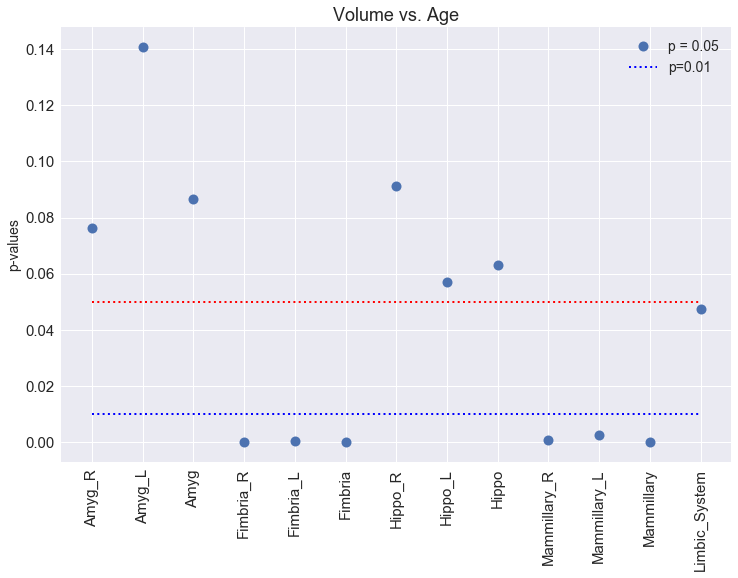

In [186]:
#plot P-values
p_values = pd.DataFrame({'p_values': p_value}, index=sets)   
plt.figure(figsize=(12,8))
plt.plot(p_values['p_values'],'.',markersize = 20)
plt.xticks(rotation='vertical',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('p-values', fontsize=14)
plt.plot(np.arange(p_values.shape[0]), np.full(p_values.shape[0],0.001), 'b:', linewidth=2)
plt.plot(np.arange(p_values.shape[0]), np.full(p_values.shape[0],0.05), 'r:', linewidth=2)
plt.legend(['p = 0.05','p=0.001'], loc='upper right', fontsize=14) 
plt.title('Volume vs. Age',fontsize = 18);
print(p_values)

In [192]:
# P-test
for i in range(len(p_values)):
    if p_values.p_values[i] <= 0.001:
        print('The volume of the '+sets[i]+'has significantly difference in people of different ages in the dataset.')
    elif p_values.p_values[i] <= 0.05:
        print('The volume of the '+sets[i]+' has difference in people of different ages in the dataset.')
    else:
        print('There is no significant difference among the average volume of the '+sets[i]+' in people of different ages in the dataset.')

There is no difference between the average volume of the Amyg_R in the control group and ANDI group in the dataset.
There is no difference between the average volume of the Amyg_L in the control group and ANDI group in the dataset.
There is no difference between the average volume of the Amyg in the control group and ANDI group in the dataset.
There is a significant difference between the average volume of the Fimbria_R in the control group and ANDI group in the dataset.
There is a significant difference between the average volume of the Fimbria_L in the control group and ANDI group in the dataset.
There is a significant difference between the average volume of the Fimbria in the control group and ANDI group in the dataset.
There is no difference between the average volume of the Hippo_R in the control group and ANDI group in the dataset.
There is no difference between the average volume of the Hippo_L in the control group and ANDI group in the dataset.
There is no difference between t